In [38]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [16]:
df = pd.read_csv('/content/Loan_payments_data[1].csv')

In [17]:
df

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female


In [18]:
df.shape

(500, 11)

In [19]:
df.columns

Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'paid_off_time', 'past_due_days', 'age', 'education',
       'Gender'],
      dtype='object')

In [20]:
df.drop('Loan_ID', axis=1, inplace=True)

In [21]:
df

,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
...,...,...,...,...,...,...,...,...,...,...
495,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female


In [10]:
df.isnull().sum()

,0
Loan_ID,0
loan_status,0
Principal,0
terms,0
effective_date,0
due_date,0
paid_off_time,100
past_due_days,300
age,0
education,0


In [22]:
print("Missing values before handling:\n", df.isnull().sum())

Missing values before handling:
 loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64


In [55]:
df['paid_off_time'] = df['paid_off_time'].fillna("Not Paid")
df['past_due_days'] = df['past_due_days'].fillna(0)
df.fillna({'paid_off_time': 'Not Paid', 'past_due_days': 0}, inplace=True)

In [29]:
print("Missing values after handling:\n", df.isnull().sum())

Missing values after handling:
 loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
paid_off_time     0
past_due_days     0
age               0
education         0
Gender            0
dtype: int64


In [30]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical columns before encoding:", categorical_cols)

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


Categorical columns before encoding: Index(['loan_status', 'effective_date', 'due_date', 'paid_off_time',
       'education', 'Gender'],
      dtype='object')


In [31]:
print("\nData after Label Encoding:\n", df.head())


Data after Label Encoding:
    loan_status  Principal  terms  effective_date  due_date  paid_off_time  \
0            2       1000     30               5         6            169   
1            2       1000     30               5         6             99   
2            2       1000     30               5         6            252   
3            2       1000     15               5        18            209   
4            2       1000     30               6         7            221   

   past_due_days  age  education  Gender  
0          36.01   45          1       1  
1          36.01   50          0       0  
2          36.01   33          0       0  
3          36.01   27          3       1  
4          36.01   28          3       0  


In [32]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [33]:
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)
print("\nScaled data sample:\n", df_scaled.head())


Scaled data sample:
    loan_status  Principal     terms  effective_date  due_date  paid_off_time  \
0         0.75   0.493377  0.897891        2.638574 -0.441539      -0.080752   
1         0.75   0.493377  0.897891        2.638574 -0.441539      -0.807690   
2         0.75   0.493377  0.897891        2.638574 -0.441539       0.781188   
3         0.75   0.493377 -0.978972        2.638574  0.811647       0.334641   
4         0.75   0.493377  0.897891        3.432369 -0.337107       0.459259   

   past_due_days       age  education    Gender  
0            0.0  2.284043  -0.652946  0.426653  
1            0.0  3.106587  -1.518923 -2.343823  
2            0.0  0.309935  -1.518923 -2.343823  
3            0.0 -0.677119   1.079007  0.426653  
4            0.0 -0.512610   1.079007 -2.343823  


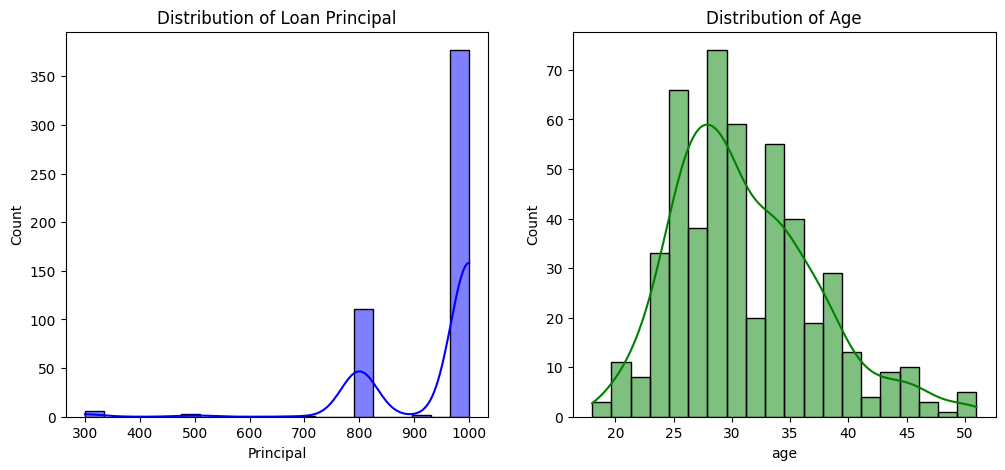

/tmp/ipython-input-2302990430.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="loan_status", data=df, palette="Set2")


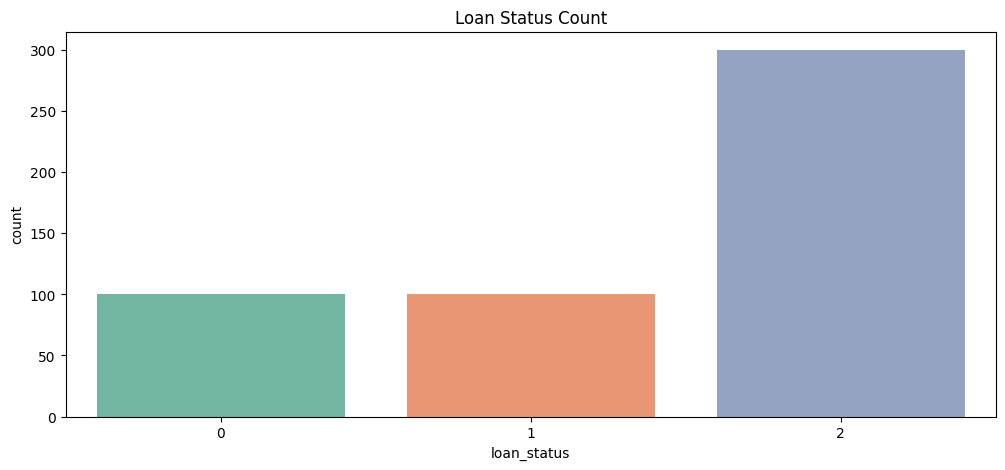

/tmp/ipython-input-2302990430.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="loan_status", y="Principal", data=df, palette="Set3")


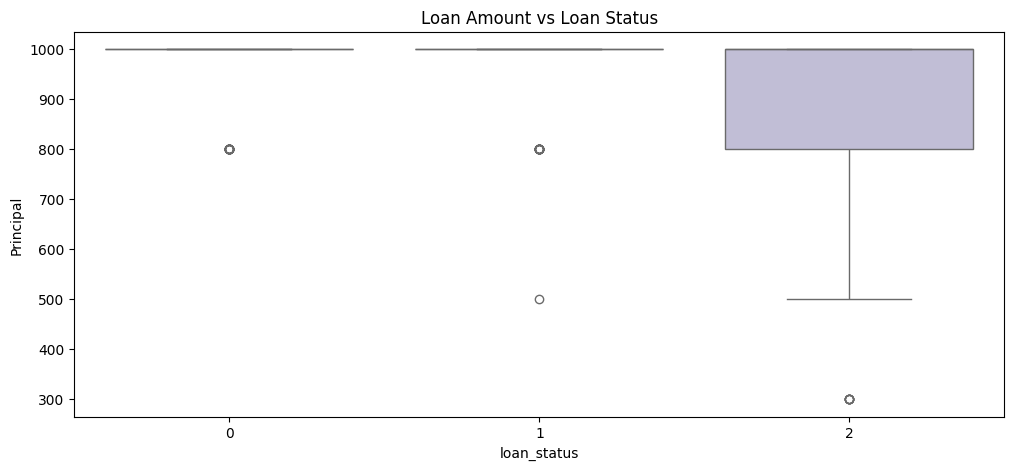

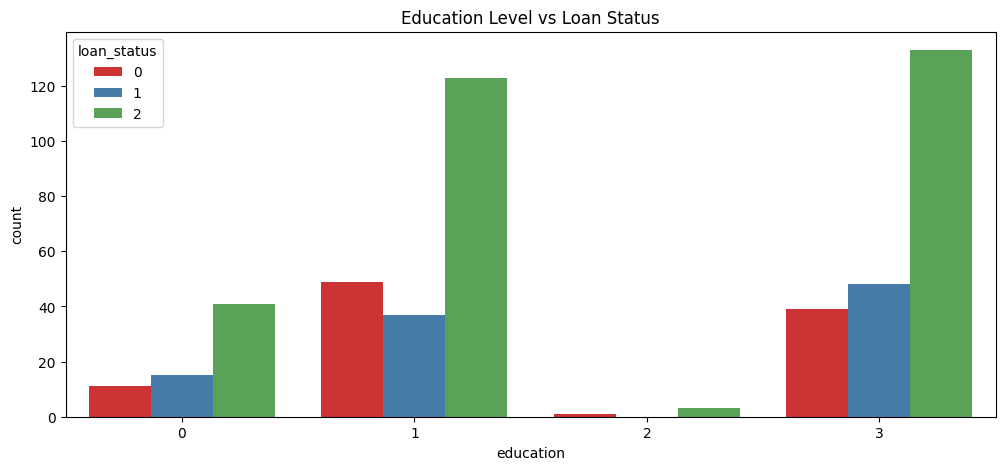

In [35]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Principal'], kde=True, bins=20, color="blue")
plt.title("Distribution of Loan Principal")

plt.subplot(1,2,2)
sns.histplot(df['age'], kde=True, bins=20, color="green")
plt.title("Distribution of Age")
plt.show()

# --- 2. Compare Features vs Loan Status ---
plt.figure(figsize=(12,5))
sns.countplot(x="loan_status", data=df, palette="Set2")
plt.title("Loan Status Count")
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x="loan_status", y="Principal", data=df, palette="Set3")
plt.title("Loan Amount vs Loan Status")
plt.show()

plt.figure(figsize=(12,5))
sns.countplot(x="education", hue="loan_status", data=df, palette="Set1")
plt.title("Education Level vs Loan Status")
plt.show()

In [36]:
df_encoded = df.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df_encoded.select_dtypes(include="object"):
    df_encoded[col] = le.fit_transform(df_encoded[col])

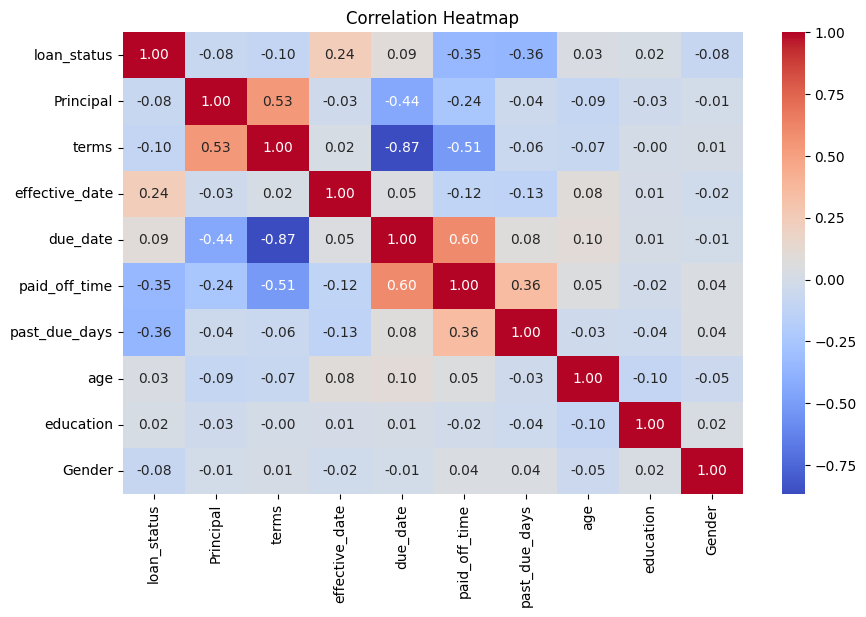

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [39]:
le = LabelEncoder()
for col in df.select_dtypes(include="object"):
    df[col] = le.fit_transform(df[col])

In [40]:
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [42]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100)
}

In [44]:
for name, model in models.items():
    print(f"\n🔹 Model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


🔹 Model: Logistic Regression

🔹 Model: Decision Tree

🔹 Model: Random Forest


In [46]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.99
Confusion Matrix:
 [[20  0  0]
 [ 0 19  1]
 [ 0  0 60]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.95      0.97        20
           2       0.98      1.00      0.99        60

    accuracy                           0.99       100
   macro avg       0.99      0.98      0.99       100
weighted avg       0.99      0.99      0.99       100



In [47]:
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [51]:
results = []

for name, model in models.items():
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-Score": f1_score(y_test, y_pred, average='weighted'),
        "ROC-AUC": roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
                  if hasattr(model, "predict_proba") else None
    })

In [53]:
print("\n📊 Model Comparison Table:\n")
print(results_df)


📊 Model Comparison Table:

                 Model  Accuracy  Precision  Recall  F1-Score   ROC-AUC
0  Logistic Regression      0.93   0.937313    0.93  0.924505  0.971250
1        Decision Tree      0.99   0.990164    0.99  0.989913  0.987500
2        Random Forest      0.99   0.990164    0.99  0.989913  0.998715


/tmp/ipython-input-4023601209.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")


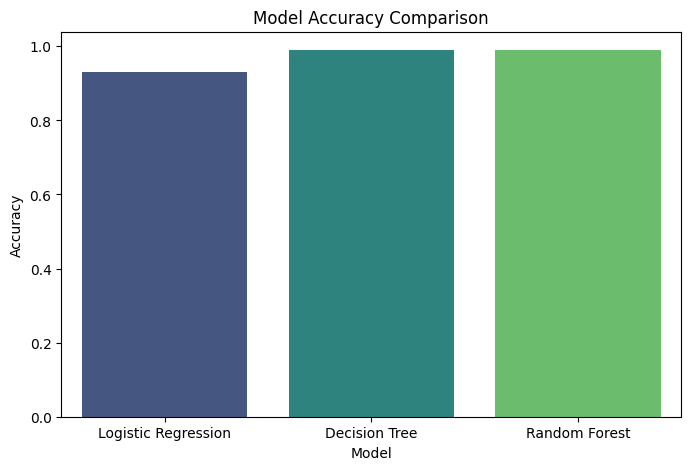

/tmp/ipython-input-4023601209.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="F1-Score", data=results_df, palette="magma")


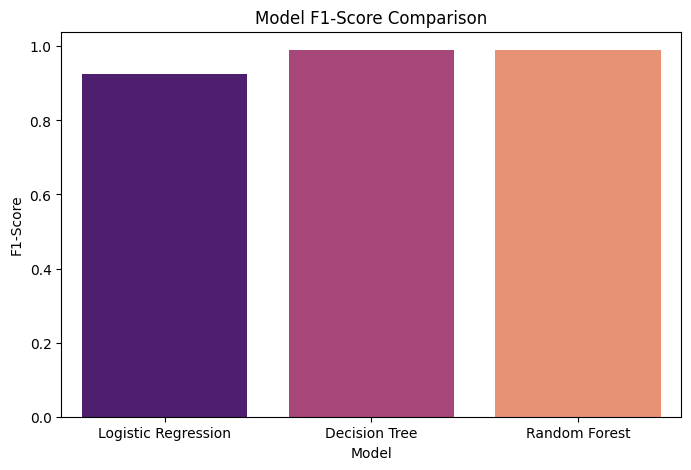

In [54]:
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="F1-Score", data=results_df, palette="magma")
plt.title("Model F1-Score Comparison")
plt.show()